In [268]:
#Librairies utilisées:

import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
import numpy as np
import seaborn as sns
import plotly 
import plotly.graph_objects as go
import chart_studio
import chart_studio.plotly as py
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
plotly.offline.init_notebook_mode()
import plotly.express as px
from pySankey.sankey import sankey
init_notebook_mode(connected=True)         # initiate notebook for offline plot
from plotly.subplots import make_subplots
import plotly.io as pio
#pio.renderers.default = 'svg'
pio.renderers.default = 'browser'
import plotly.offline as pyo
pyo.init_notebook_mode()
from IPython.display import Image, HTML, display, SVG
import missingno as msno



In [269]:
#Données brutes
data= pd.read_excel(r'~/8e49d734-bd63-432d-814e-6c4599f33f04.xlsx')
data


AGE   SEXE  TDT  PAR  CHOLESTEROL  GAJ     ECG  FCMAX ANGINE  \
0     40  homme   AA  140          289    0  Normal    172    Non   
1     49  femme  DNA  160          180    0  Normal    156    Non   
2     37  homme   AA  130          283    0      ST     98    Non   
3     48  femme  ASY  138          214    0  Normal    108    Oui   
4     54  homme  DNA  150          195    0  Normal    122    Non   
..   ...    ...  ...  ...          ...  ...     ...    ...    ...   
913   45  homme   AT  110          264    0  Normal    132    Non   
914   68  homme  ASY  144          193    1  Normal    141    Non   
915   57  homme  ASY  130          131    0  Normal    115    Oui   
916   57  femme   AA  130          236    0     LVH    174    Non   
917   38  homme  DNA  138          175    0  Normal    173    Non   

     DEPRESSION       PENTE  CŒUR  
0            0.0  Ascendant     0  
1            1.0       Plat     1  
2            0.0  Ascendant     0  
3            1.5       Plat     1  
4            0.0  Ascendant     0  
..           ...        ...   ...  
913          1.2       Plat     1  
914          3.4       Plat     1  
915          1.2       Plat     1  
916          0.0       Plat     1  
917          0.0  Ascendant     0  

[918 rows x 12 columns]

In [270]:
# Analyse globale 

desc=data.describe(include='all')
desc


AGE   SEXE  TDT         PAR  CHOLESTEROL         GAJ     ECG  \
count   918.000000    918  918  918.000000   918.000000  918.000000     918   
unique         NaN      2    4         NaN          NaN         NaN       3   
top            NaN  homme  ASY         NaN          NaN         NaN  Normal   
freq           NaN    725  496         NaN          NaN         NaN     552   
mean     53.510893    NaN  NaN  132.396514   198.799564    0.233115     NaN   
std       9.432617    NaN  NaN   18.514154   109.384145    0.423046     NaN   
min      28.000000    NaN  NaN    0.000000     0.000000    0.000000     NaN   
25%      47.000000    NaN  NaN  120.000000   173.250000    0.000000     NaN   
50%      54.000000    NaN  NaN  130.000000   223.000000    0.000000     NaN   
75%      60.000000    NaN  NaN  140.000000   267.000000    0.000000     NaN   
max      77.000000    NaN  NaN  200.000000   603.000000    1.000000     NaN   

             FCMAX ANGINE  DEPRESSION  PENTE        CŒUR  
count   918.000000    918   918.000000   918  918.000000  
unique         NaN      2          NaN     3         NaN  
top            NaN    Non          NaN  Plat         NaN  
freq           NaN    547          NaN   460         NaN  
mean    136.809368    NaN     0.887364   NaN    0.553377  
std      25.460334    NaN     1.066570   NaN    0.497414  
min      60.000000    NaN    -2.600000   NaN    0.000000  
25%     120.000000    NaN     0.000000   NaN    0.000000  
50%     138.000000    NaN     0.600000   NaN    1.000000  
75%     156.000000    NaN     1.500000   NaN    1.000000  
max     202.000000    NaN     6.200000   NaN    1.000000

In [271]:
info=data.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          918 non-null    int64  
 1   SEXE         918 non-null    object 
 2   TDT          918 non-null    object 
 3   PAR          918 non-null    int64  
 4   CHOLESTEROL  918 non-null    int64  
 5   GAJ          918 non-null    int64  
 6   ECG          918 non-null    object 
 7   FCMAX        918 non-null    int64  
 8   ANGINE       918 non-null    object 
 9   DEPRESSION   918 non-null    float64
 10  PENTE        918 non-null    object 
 11  CŒUR         918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


<AxesSubplot:>

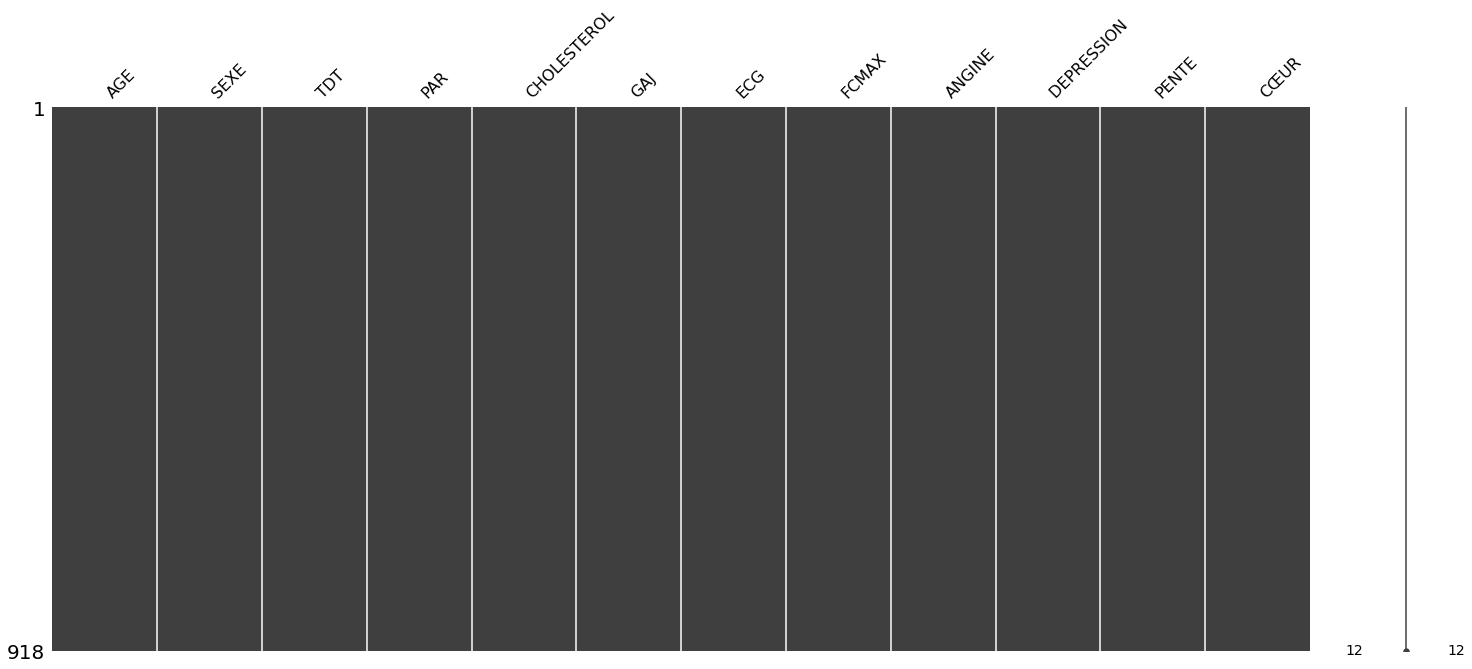

In [272]:
#Valeurs manquantes : Pas de valeur manquante
na_values=msno.matrix(data)
na_values

<AxesSubplot:>

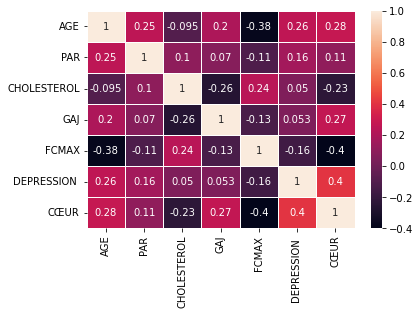

In [273]:
#Corrélation jeu de données
sns.heatmap(data.corr(), annot=True, linewidths=0.5)

In [274]:
#Personnes malades 
is_sick =  data[data.CŒUR == 1]

#Personnes malades 
is_notsick =  data[data.CŒUR == 0]


In [275]:
# Données moyennes par genre des personnes malades

sickgenre = is_sick.groupby(['SEXE']).mean()
sickgenre    



AGE         PAR  CHOLESTEROL       GAJ       FCMAX  DEPRESSION   \
SEXE                                                                           
femme  56.180000  142.000000   223.340000  0.320000  137.820000     1.336000   
homme  55.868996  133.331878   170.766376  0.336245  126.545852     1.267467   

       CŒUR  
SEXE         
femme   1.0  
homme   1.0

In [276]:
# Données moyennes par genre des personnes non malades

notsickgenre = is_notsick.groupby(['SEXE']).mean()
notsickgenre

AGE         PAR  CHOLESTEROL       GAJ       FCMAX  DEPRESSION   \
SEXE                                                                           
femme  51.202797  128.790210   247.440559  0.069930  149.048951     0.435664   
homme  50.202247  130.925094   216.239700  0.127341  147.670412     0.393258   

       CŒUR  
SEXE         
femme   0.0  
homme   0.0

In [277]:
#2/ Les individus

# Ratio FEMME/HOMME de la maladie cardiaque

coeur_sexe = data.groupby(by=["SEXE", "CŒUR"]).count()[["ANGINE"]].rename(columns={"ANGINE":"Count"}).reset_index()
coeur_sexe['CŒUR'] =  coeur_sexe['CŒUR'] .replace([0,1],['pas malade','malade'])
#print(coeur_sexe)

#Graphique HOMME / FEMME
fig = px.sunburst(coeur_sexe, path=['SEXE',"CŒUR"], values='Count',color="SEXE",labels={
                     "0": "Homme",
                     "1": "Femme"
                 }, hover_data={"SEXE": True})
fig.layout.update(title_text="Ratio Femme/Homme par rapport à la maladie")

fig.show()

In [296]:
is_sick.CŒUR.sum()

508

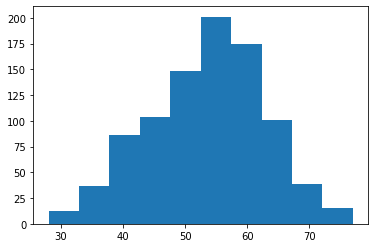

In [286]:
plt.hist(data['AGE'])
plt.show() 

<AxesSubplot:ylabel='Density'>

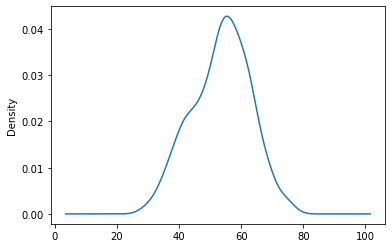

In [298]:
data.AGE.plot(kind = "kde")

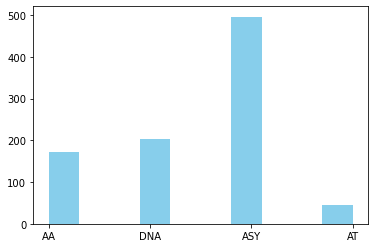

In [287]:
colors = ['red', 'tan', 'lime', 'skyblue']
plt.hist(data['TDT'], color = 'skyblue')
plt.show() 

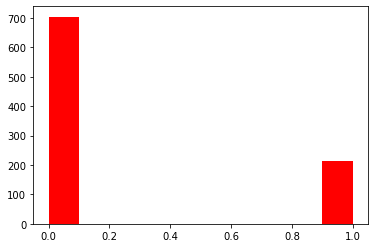

In [288]:


colors = ['red', 'tan', 'lime', 'skyblue']
plt.hist(data['GAJ'], color = 'red')
plt.show() 



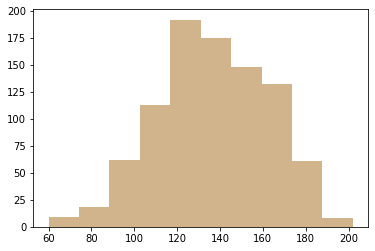

In [290]:
plt.hist(data['FCMAX'], color = 'tan')
plt.show() 

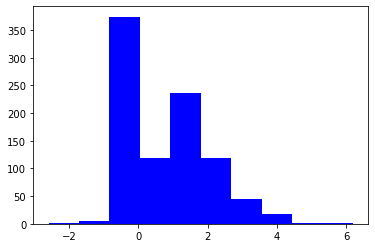

In [292]:


plt.hist(data['DEPRESSION '], color = 'blue')
plt.show() 



<AxesSubplot:>

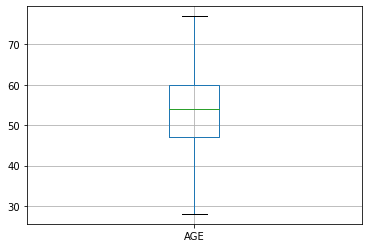

In [293]:
data.boxplot(column='AGE')

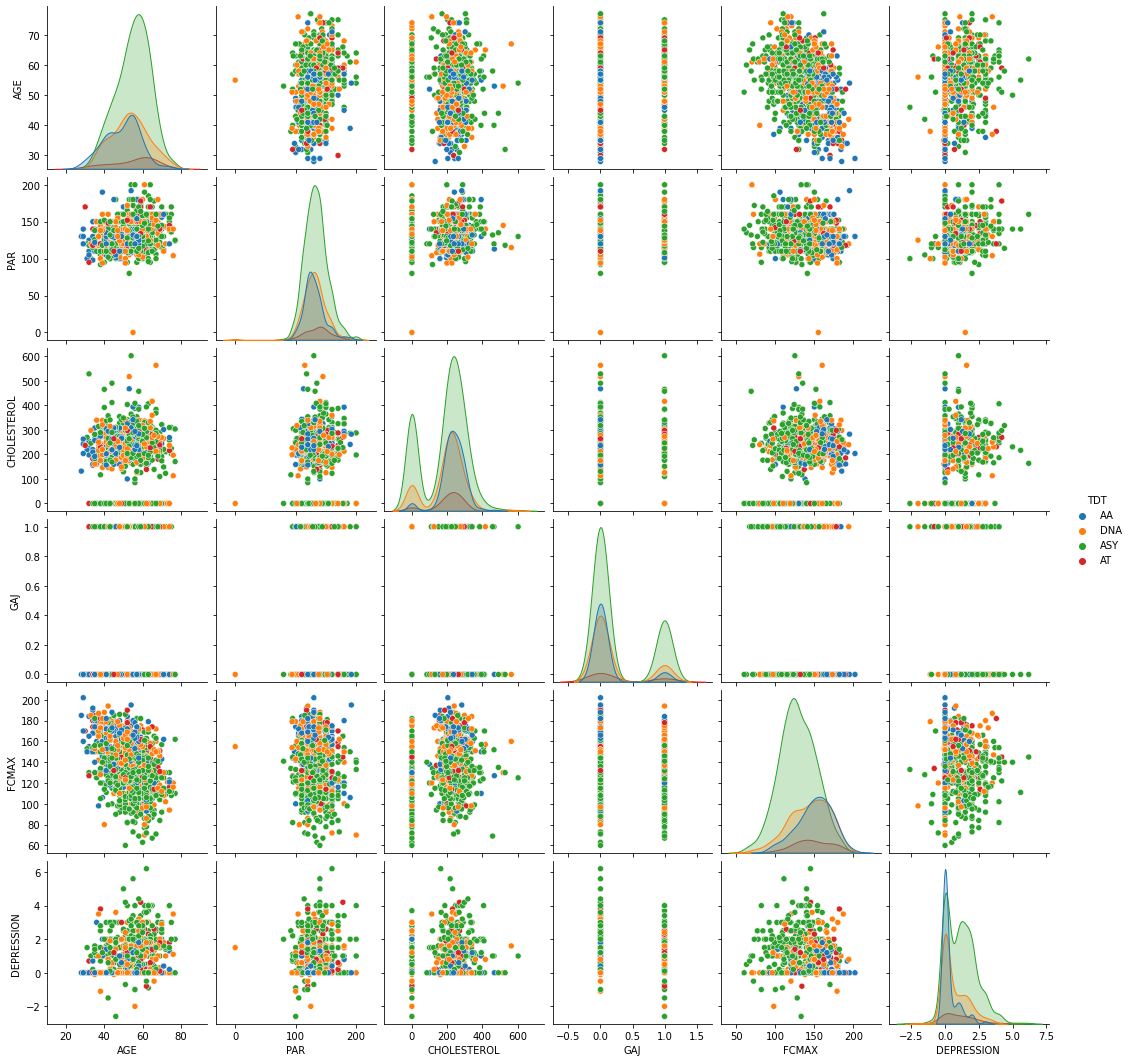

In [295]:
# Plot pair variable analysis
pair=sns.pairplot(data, hue='TDT')
pair

In [278]:
#3/ Symptômes face à la maladie cardiaque :: TDT et Angine


is_sick =  data[data.CŒUR == 1]
fig_sick1= px.scatter(is_sick, x="AGE", y="TDT", color="SEXE")
#fig_sick1.show()

fig_sick2 = px.scatter(is_sick, x="AGE", y="ANGINE", size="AGE", color="SEXE")
#fig_sick2.show()

fig = make_subplots(rows=3, cols=1, subplot_titles=("Personnes malades","Personnes non-malades"))

fig.append_trace(go.Scatter(
    x=is_sick['AGE'],
    y=is_sick['TDT'],mode='markers',
), row=1, col=1)

fig.append_trace(go.Scatter(
    x=isnot_sick['AGE'],
    y=isnot_sick['TDT'],mode='markers',
), row=2, col=1)
fig['layout']['xaxis2']['title']='Age'

fig.update_layout(showlegend=False,height=600, width=600, title_text="Analyse TDT")
fig.show()



In [279]:
#3/ Symptômes de la maladie cardiaque : Angine

# Comparaison avec personnes non malades
isnot_sick =  data[data.CŒUR == 0]
fig_notsick = px.scatter(isnot_sick, x="AGE", y="TDT", color="SEXE")
#fig_notsick.show()

fig_nosick2 = px.scatter(isnot_sick, x="AGE", y="ANGINE", size="AGE", color="SEXE")
#fig_nosick2.show()


fig_angine = make_subplots(rows=3, cols=1, subplot_titles=("Personnes malades","Personnes non-malades"))

fig_angine.append_trace(go.Scatter(
    x=is_sick['AGE'],
    y=is_sick['ANGINE'],mode='markers',
), row=1, col=1)

fig_angine.append_trace(go.Scatter(
    x=isnot_sick['AGE'],
    y=isnot_sick['ANGINE'],mode='markers',
), row=2, col=1)


fig_angine.update_layout(showlegend=False,height=600, width=600, title_text="Analyse Angine")
fig_angine.show()


In [280]:
#4/ Quelles sont les causes de la maladie ? 

# Ensemble des facteurs aggravants les risques cardiaques : Cholestérol, glycémie, la dépression, et la pression arterielle

plot_PAR = px.violin(data, x=data['CŒUR'], y=data['PAR'], color=data['SEXE'],points="all")
plot_PAR.show()

plot_CHOL= px.violin(data, x=data['CŒUR'], y=data['CHOLESTEROL'], color=data['SEXE'],points="all")
plot_CHOL.show()

plot_DEP= px.violin(data, x=data['CŒUR'], y=data['DEPRESSION '], color=data['SEXE'],points="all")
plot_DEP.show()




<AxesSubplot:>

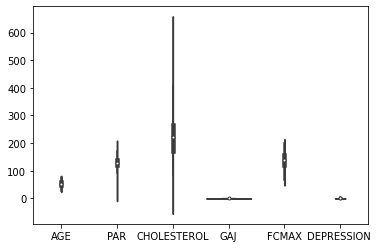

In [299]:
outliers=sns.violinplot(data=data, palette="muted", split=True)
outliers

<AxesSubplot:xlabel='AGE', ylabel='CHOLESTEROL'>

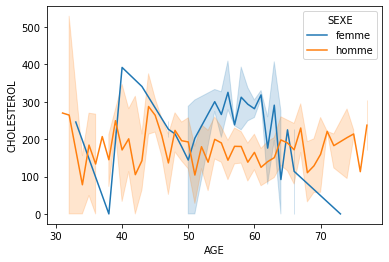

In [297]:
sns.lineplot(data=is_sick, x="AGE", y="CHOLESTEROL", hue="SEXE")

In [281]:
#4/ Quelles sont les causes de la maladie ? 

#Répartition des hommes et des femmes en fonction de la glycémie
is_sick =  data[data.CŒUR == 1]
GAJSEX = data.groupby(by=["SEXE",'CŒUR','GAJ']).count().reset_index()
GAJSEX['CŒUR'] =  GAJSEX['CŒUR'] .replace([0,1],['pas malade','malade'])
GAJSEX['GAJ'] =  GAJSEX['GAJ'] .replace([0,1],['pas glycémie','glycémie'])

fig_GAJSEX = px.treemap(GAJSEX, path=["SEXE",'CŒUR','GAJ'],values='ANGINE')
fig_GAJSEX.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig_GAJSEX.show()

In [282]:
# 5/ Résultats d'un test d'effort

data['CŒUR'] =  data['CŒUR'] .replace([0,1],['pas malade','malade'])

#Analyse Frequence cardiaque max d'une personne malade ou non, en fonction de l'âge
fig_fcmax = px.scatter_3d(data, x="AGE", 
                    y="CŒUR",  
                    z='FCMAX',  
                    color='SEXE',
                    size="CHOLESTEROL",title="Répartition des hommes & femmes cardiaques selon leur fréquence cardiaque maximale,  et l'âge")) 
  
fig_fcmax.show()


In [283]:

fig_scattertroisd = px.scatter_3d(is_sick, x='AGE', 
                    y='SEXE',  
                    z='FCMAX', 
                    size = 'CHOLESTEROL',
                    color='ANGINE',
                   title="Répartition des hommes & femmes cardiaques selon leur fréquence cardiaque maximale,l'âge,le taux de cholestherol et l'angine")
  
fig_scattertroisd.show()

In [284]:
#Analyse l'ECG d'une personne malade ou non

lastsick=is_sick.groupby(['SEXE','ECG']).count().reset_index()
fig_issick= px.funnel(lastone, x='AGE', y='ECG', color='SEXE',title="Nombre de personne malade en fonction de l'ECG")
fig_issick.show()

lastnot=isnot_sick.groupby(['SEXE','ECG']).count().reset_index()
fig_isnot= px.funnel(lastnot, x='AGE', y='ECG', color='SEXE',title="Nombre de personne non-malade en fonction de l'ECG")
fig_isnot.show()